# House Sales in King County

### Importing all libraries, read data and clean data.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import matplotlib.ticker as mticker
from IPython.display import display

sns.set_style("whitegrid")
%matplotlib inline


In [2]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Questions

### 1. **Waterfront Effect**: Is there a significant price difference between waterfront and non-waterfront houses? 

In [5]:
waterfront_properties = df[df["waterfront"] == 1]
non_waterfront_properties = df[df["waterfront"] == 0]

total_waterfront = len(waterfront_properties)
total_non_waterfront = len(non_waterfront_properties)

print(f"Total Waterfront Properties: {total_waterfront}")
print(f"Total Non-Waterfront properties: {total_non_waterfront}")


Total Waterfront Properties: 163
Total Non-Waterfront properties: 21450


In [6]:
waterfront_properties_mean_price = waterfront_properties["price"].mean()
non_waterfront_properties_mean_price = non_waterfront_properties["price"].mean()

print(f"Average Price of Waterfront Properties: {waterfront_properties_mean_price}")
print(f"Average Price of Non-Waterfront Properties: {non_waterfront_properties_mean_price}")

Average Price of Waterfront Properties: 1661876.0245398772
Average Price of Non-Waterfront Properties: 531563.5998135199


- From this we can see that water front houses have more than 3 times higher average price. 

In [7]:
def calculate_avg_metrics_by_bedrooms(properties, label):
    avg_metrics = properties.groupby("bedrooms")[["price", "sqft_lot", "sqft_living"]].mean().sort_index()
    return avg_metrics

pd.options.display.float_format = '{:,.2f}'.format

# Calculate averages for waterfront and non-waterfront properties
avg_metrics_water = calculate_avg_metrics_by_bedrooms(waterfront_properties, "Waterfront Properties")
avg_metrics_non_water = calculate_avg_metrics_by_bedrooms(non_waterfront_properties, "Non-Waterfront Properties")

# Create DataFrame with both property types
avg_metrics = pd.DataFrame({
    "Waterfront Price": avg_metrics_water["price"],
    "Waterfront Lot Sqft": avg_metrics_water["sqft_lot"],
    "Non-Waterfront Price": avg_metrics_non_water["price"],
    "Non-Waterfront Lot Sqft": avg_metrics_non_water["sqft_lot"],
}).fillna(0)

# Filter rows where both "Waterfront" and "Non-Waterfront" have non-zero values
avg_metrics_filtered = avg_metrics[
    (avg_metrics["Waterfront Price"] > 0) & (avg_metrics["Non-Waterfront Price"] > 0)
]

# Print results
print("Filtered Comparison of Average Prices, Lot Sizes, and Living Spaces by Bedrooms:")
print(avg_metrics)
print(avg_metrics_filtered)


Filtered Comparison of Average Prices, Lot Sizes, and Living Spaces by Bedrooms:
          Waterfront Price  Waterfront Lot Sqft  Non-Waterfront Price  \
bedrooms                                                                
0                     0.00                 0.00            409,503.85   
1               622,680.00            17,323.80            309,781.10   
2               918,567.48            19,462.61            395,497.62   
3             1,526,424.22            34,794.31            459,280.00   
4             1,928,485.00            17,055.65            627,859.93   
5             2,770,592.11            22,366.26            762,771.86   
6             2,956,250.00            27,906.75            793,718.71   
7                     0.00                 0.00            951,184.66   
8                     0.00                 0.00          1,105,076.92   
9                     0.00                 0.00            893,999.83   
10                    0.00                 

- Here we can see that non-water properties has some houses with more than 6 bedrooms. And from that I wanted to check is it possible that non-water properties have bigger lot. From this table is visible that waterfront  have bigger lots.

In [8]:

def calculate_avg_price_by_bedrooms(properties,label ):
    avg_price = properties.groupby("bedrooms")["price"].mean().sort_index()
    
    return avg_price

pd.options.display.float_format = '{:,.0f}'.format

avg_price_water = calculate_avg_price_by_bedrooms(waterfront_properties, "Waterfront Properties")
avg_price_non_water = calculate_avg_price_by_bedrooms(non_waterfront_properties, "Non-Waterfront Properties")

avg_prices = pd.DataFrame({
    "Waterfront": avg_price_water,
    "Non-Waterfront": avg_price_non_water}).fillna(0)

avg_prices_filtered = avg_prices[(avg_prices["Waterfront"] > 0 ) & (avg_prices["Non-Waterfront"] > 0)]

print("Filtered Comparison of Average Prices by Bedrooms:")
print(avg_prices_filtered)

Filtered Comparison of Average Prices by Bedrooms:
          Waterfront  Non-Waterfront
bedrooms                            
1            622,680         309,781
2            918,567         395,498
3          1,526,424         459,280
4          1,928,485         627,860
5          2,770,592         762,772
6          2,956,250         793,719


- Here I selected water and non-water front houses by number of rooms and average prices. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

<Figure size 1000x600 with 0 Axes>

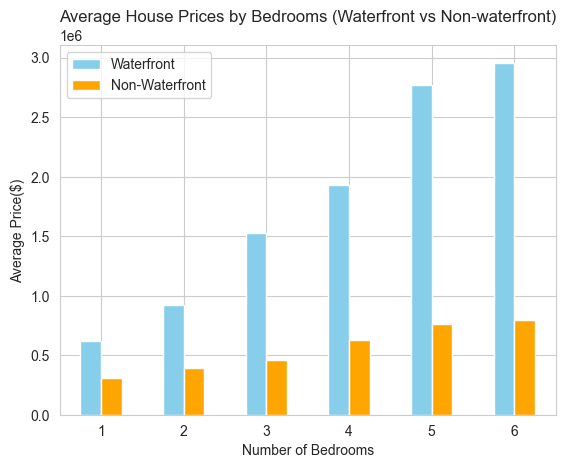

In [9]:
plt.figure(figsize=(10, 6))
avg_prices_filtered_plot = avg_prices_filtered.plot(kind="bar", color=["skyblue", "orange"])

plt.title("Average House Prices by Bedrooms (Waterfront vs Non-waterfront)")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price($)")
plt.xticks(rotation=0)



## Conclusion

There is a **significant price difference** between **waterfront and non-waterfront properties**. In addition to the premium for scenic views, **waterfront properties generally come with larger lots**, contributing to their higher prices. The added privacy—due to having no neighbors on the water-facing side—further enhances their value. Buyers are not only paying for the **view** but also for **larger land, exclusivity, and a unique living experience**.


### 2. **Build Year Influence**: Does the year a house was built impact it's price? 

Years common in both waterfront and non-waterfront data:
Index([1903, 1905, 1908, 1912, 1913, 1915, 1916, 1917, 1918, 1919, 1923, 1925,
       1926, 1928, 1930, 1931, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1941, 1942, 1943, 1945, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1965, 1966, 1967,
       1968, 1970, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1983, 1984, 1985, 1988, 1989, 1990, 1991, 1992, 1993, 1996, 1998, 1999,
       2000, 2001, 2002, 2004, 2005, 2006, 2007, 2012, 2014],
      dtype='int64', name='yr_built')


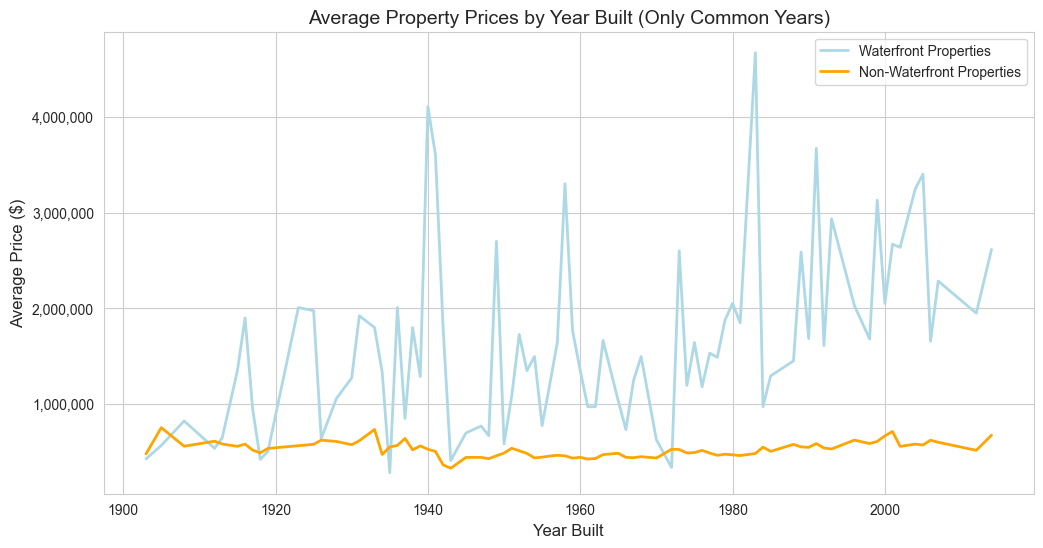

In [10]:
waterfront_properties_year_build = waterfront_properties.groupby("yr_built")["price"].mean()
non_waterfront_properties_year_build = non_waterfront_properties.groupby("yr_built")["price"].mean()

common_years = waterfront_properties_year_build.index.intersection(non_waterfront_properties_year_build.index)

waterfront_common = waterfront_properties_year_build.loc[common_years]
non_waterfront_common = non_waterfront_properties_year_build.loc[common_years]

print("Years common in both waterfront and non-waterfront data:")
print(common_years)

plt.figure(figsize=(12, 6))

plt.plot(common_years, waterfront_common.values, label="Waterfront Properties", color="lightblue", linewidth=2)
plt.plot(common_years, non_waterfront_common.values, label="Non-Waterfront Properties", color="orange", linewidth=2)

plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.title("Average Property Prices by Year Built (Only Common Years)", fontsize=14)
plt.legend()
plt.grid(True)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


plt.show()


This graphic shows that waterfront houses maintain significantly higher and more volatile prices over time, reflecting their premium value, while non-waterfront houses have more stable and modest price trends.

## Conclusion

The graph reveals that while build year influences property prices, waterfront houses maintain significantly higher and more volatile prices over time compared to the steadier trends of non-waterfront houses, highlighting the premium value of waterfront locations.

### 3. **Renovation Impact**: How does renovation affect house prices?

In [11]:


# Define a function to calculate property counts and average prices
def calculate_counts_and_prices(properties, label):
    renovated = properties[properties["yr_renovated"] != 0]
    non_renovated = properties[properties["yr_renovated"] == 0]
    print(f"Number of Renovated {label} Properties: {renovated.shape[0]}")
    print(f"Number of Non-Renovated {label} Properties: {non_renovated.shape[0]}")
    print(f"Average Price of Renovated {label} Properties: {renovated['price'].mean():,.0f}")
    print(f"Average Price of Non-Renovated {label} Properties: {non_renovated['price'].mean():,.0f}\n")
    


# Calculate for waterfront and non-waterfront properties
calculate_counts_and_prices(waterfront_properties, "Waterfront")
calculate_counts_and_prices(non_waterfront_properties, "Non-Waterfront")


Number of Renovated Waterfront Properties: 42
Number of Non-Renovated Waterfront Properties: 121
Average Price of Renovated Waterfront Properties: 1,593,230
Average Price of Non-Renovated Waterfront Properties: 1,685,704

Number of Renovated Non-Waterfront Properties: 872
Number of Non-Renovated Non-Waterfront Properties: 20578
Average Price of Renovated Non-Waterfront Properties: 720,265
Average Price of Non-Renovated Non-Waterfront Properties: 523,567



From here we are getting that non renovated waterfront Properties are more expensive than renovated. On other side renovated non-waterfront properties are more expensive like we expected. Situation with waterfront is like that maybe because houses are newer or depends from sizes.

In [12]:
# Set pandas to display float values with commas (for prices) and no decimals
pd.options.display.float_format = '{:,.0f}'.format  

# Define function to calculate statistics
def calculate_counts_and_prices(properties, label):
    
    # Separate renovated and non-renovated properties
    renovated = properties[properties["yr_renovated"] != 0]
    non_renovated = properties[properties["yr_renovated"] == 0]
    
    print(f"Number of Renovated {label} Properties: {renovated.shape[0]}")
    print(f"Number of Non-Renovated {label} Properties: {non_renovated.shape[0]}")
    print(f"Average Price of Renovated {label} Properties: {renovated['price'].mean():,.0f}")
    print(f"Average Price of Non-Renovated {label} Properties: {non_renovated['price'].mean():,.0f}\n")

    # Group by bedrooms and calculate mean values
    avg_renovated = renovated.groupby("bedrooms")[["price", "yr_built", "yr_renovated"]].mean()
    avg_non_renovated = non_renovated.groupby("bedrooms")[["price", "yr_built"]].mean()

    # Add 'yr_renovated' column to non-renovated DataFrame with 0 (since they weren’t renovated)
    avg_non_renovated["yr_renovated"] = 0  

    # Get all unique bedroom categories (ensures both DataFrames have same index)
    all_bedroom_categories = sorted(set(avg_renovated.index) | set(avg_non_renovated.index))  
    avg_renovated = avg_renovated.reindex(all_bedroom_categories).fillna(0)
    avg_non_renovated = avg_non_renovated.reindex(all_bedroom_categories).fillna(0)

    # Convert years to integers
    avg_renovated["yr_built"] = avg_renovated["yr_built"].astype(int)
    avg_renovated["yr_renovated"] = avg_renovated["yr_renovated"].astype(int)
    avg_non_renovated["yr_built"] = avg_non_renovated["yr_built"].astype(int)
    avg_non_renovated["yr_renovated"] = avg_non_renovated["yr_renovated"].astype(int)

    # Combine into a single DataFrame
    avg_summary = pd.DataFrame({
        "Bedrooms": all_bedroom_categories,
        f"Yr Built (Non-Renovated {label})": avg_non_renovated["yr_built"],
        f"Yr Built (Renovated {label})": avg_renovated["yr_built"],
        f"Renovation Year (Renovated {label})": avg_renovated["yr_renovated"],
        f"Price (Non-Renovated {label})": avg_non_renovated["price"],
        f"Price (Renovated {label})": avg_renovated["price"],
    }).set_index("Bedrooms")  # Set bedrooms as the index

    # Display table properly in Jupyter Notebook
    display(avg_summary)

    # Print as markdown for terminal readability
    print("\nComparison of Houses by Bedrooms for", label)
    print(avg_summary.to_markdown())

    # Save as CSV for further analysis
    avg_summary.to_csv(f"comparison_{label.lower().replace(' ', '_')}.csv")

    print("\n" + "-"*50 + "\n")  # Separator for readability


# Load your dataset (Ensure it's already loaded into `df`)
# df = pd.read_csv("your_dataset.csv")  # Uncomment if loading from a file

# Separate waterfront and non-waterfront properties
waterfront_properties = df[df["waterfront"] == 1]
non_waterfront_properties = df[df["waterfront"] == 0]

# Run the function for both categories
calculate_counts_and_prices(waterfront_properties, "Waterfront")
calculate_counts_and_prices(non_waterfront_properties, "Non-Waterfront")



Number of Renovated Waterfront Properties: 42
Number of Non-Renovated Waterfront Properties: 121
Average Price of Renovated Waterfront Properties: 1,593,230
Average Price of Non-Renovated Waterfront Properties: 1,685,704



,Yr Built (Non-Renovated Waterfront),Yr Built (Renovated Waterfront),Renovation Year (Renovated Waterfront),Price (Non-Renovated Waterfront),Price (Renovated Waterfront)
Bedrooms,,,,,
1,1938,0,0,"622,680",0
2,1958,1940,1992,"982,504","784,300"
3,1971,1948,1989,"1,525,089","1,529,587"
4,1971,1936,1979,"2,029,688","1,355,000"
5,1974,1955,1989,"2,512,365","3,330,083"
6,1960,1942,1983,"3,308,333","1,900,000"



Comparison of Houses by Bedrooms for Waterfront
|   Bedrooms |   Yr Built (Non-Renovated Waterfront) |   Yr Built (Renovated Waterfront) |   Renovation Year (Renovated Waterfront) |   Price (Non-Renovated Waterfront) |   Price (Renovated Waterfront) |
|-----------:|--------------------------------------:|----------------------------------:|-----------------------------------------:|-----------------------------------:|-------------------------------:|
|          1 |                                  1938 |                                 0 |                                        0 |                   622680           |                    0           |
|          2 |                                  1958 |                              1940 |                                     1992 |                   982504           |               784300           |
|          3 |                                  1971 |                              1948 |                                     1989 |  

,Yr Built (Non-Renovated Non-Waterfront),Yr Built (Renovated Non-Waterfront),Renovation Year (Renovated Non-Waterfront),Price (Non-Renovated Non-Waterfront),Price (Renovated Non-Waterfront)
Bedrooms,,,,,
0,1983,0,0,"409,504",0
1,1943,1931,1985,"305,186","357,626"
2,1956,1932,1987,"393,821","438,250"
3,1973,1940,1996,"453,664","608,065"
4,1978,1939,1998,"617,057","868,463"
5,1975,1943,1998,"751,705","985,136"
6,1965,1940,1994,"760,505","1,165,114"
7,1964,1949,2001,"935,359","1,085,700"
8,1956,0,0,"1,105,077",0



Comparison of Houses by Bedrooms for Non-Waterfront
|   Bedrooms |   Yr Built (Non-Renovated Non-Waterfront) |   Yr Built (Renovated Non-Waterfront) |   Renovation Year (Renovated Non-Waterfront) |   Price (Non-Renovated Non-Waterfront) |   Price (Renovated Non-Waterfront) |
|-----------:|------------------------------------------:|--------------------------------------:|---------------------------------------------:|---------------------------------------:|-----------------------------------:|
|          0 |                                      1983 |                                     0 |                                            0 |                       409504           |                        0           |
|          1 |                                      1943 |                                  1931 |                                         1985 |                       305186           |                   357626           |
|          2 |                                     

From here we can see that older waterfront properties are renovated but still and after renovation they have lower price. Exceptionals are 5 rooms houses maybe they are the newest and after renovation they increased their prices.

Statistics for Years Before Renovation:
count   914
mean     56
std      24
min       6
25%      37
50%      54
75%      75
max     114
dtype: float64


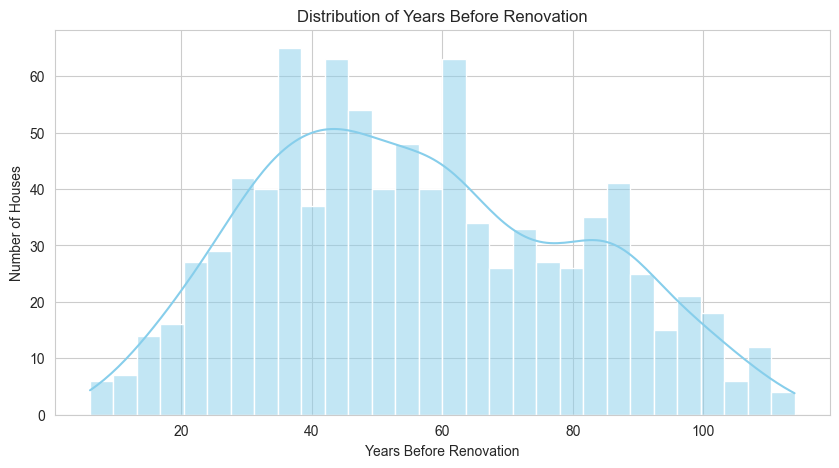

In [13]:
# Filter only renovated houses
renovated_houses = df[df["yr_renovated"] != 0]

# Calculate years before renovation
years_before_renovation = renovated_houses["yr_renovated"] - renovated_houses["yr_built"]

# Display statistical summary
print("Statistics for Years Before Renovation:")
print(years_before_renovation.describe().round(2))  # Round to 2 decimals

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(years_before_renovation, bins=30, kde=True, color="skyblue")

plt.xlabel("Years Before Renovation")
plt.ylabel("Number of Houses")
plt.title("Distribution of Years Before Renovation")
plt.grid(True)

# Show plot
plt.show()

Average properties are renovated after 56 years. From that we can conclude that maybe some of them will be renovated and automatically prices will go up.  

### 4.

In [ ]:
# Count the number of waterfront and non-waterfront properties
waterfront_properties = df[df["waterfront"] == 1]
non_waterfront_properties = df[df["waterfront"] == 0]
total_properties = waterfront_properties + non_waterfront_properties

total_waterfront = len(waterfront_properties)
total_non_waterfront = len(non_waterfront_properties)
total_properties = len(total_properties)

# Print property counts
print(f"Total Waterfront Properties: {total_waterfront}")
print(f"Total Non-Waterfront Properties: {total_non_waterfront}")
print(f"Total Properties: {total_properties}")

# General function to calculate average price and bedrooms by postal code
def calculate_avg_price_by_zipcode(properties):
    return (
        properties.groupby("zipcode")[["bedrooms", "price"]]
        .mean()
        .sort_values(by="price", ascending=False)
    )

# Compute price statistics
avg_price_zipcode = calculate_avg_price_by_zipcode(df).head(10)
avg_price_waterfront_zipcode = calculate_avg_price_by_zipcode(waterfront_properties).head(10)
avg_price_non_waterfront_zipcode = calculate_avg_price_by_zipcode(non_waterfront_properties).head(10)
avg_price_top_10_zipcode = calculate_avg_price_by_zipcode(df).head(10)

# Print results
print("\nAverage Price by Zipcode for All Properties:")
print(avg_price_zipcode)

print("\nAverage Price by Zipcode for Waterfront Properties:")
print(avg_price_waterfront_zipcode)

print("\nAverage Price by Zipcode for Non-Waterfront Properties:")
print(avg_price_non_waterfront_zipcode)

print(avg_price_top_10_zipcode)

Total Waterfront Properties: 163
Total Non-Waterfront Properties: 21450
Total Properties: 21613

Average Price by Zipcode for All Properties:
         bedrooms     price
zipcode                    
98039           4 2,160,607
98004           4 1,355,927
98040           4 1,194,230
98112           4 1,095,499
98102           3   901,258
98109           3   879,624
98105           4   862,825
98006           4   859,685
98119           3   849,448
98005           4   810,165

Average Price by Zipcode for Waterfront Properties:
         bedrooms     price
zipcode                    
98004           5 7,062,500
98039           4 3,640,900
98033           4 3,444,950
98105           5 3,051,667
98040           4 2,960,417
98144           4 2,750,000
98008           4 2,571,667
98034           4 2,481,667
98027           4 2,400,000
98115           4 2,300,000

Average Price by Zipcode for Non-Waterfront Properties:
         bedrooms     price
zipcode                    
98039           4 2,

In [ ]:
import folium

# Create a base map
map = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

# Add markers for the top 20 properties (all properties)
for idx, row in df.head(20).iterrows():  # Limit to top 10 properties
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Price: {row['price']:,}, Bedrooms: {row['bedrooms']}",
        icon=folium.Icon(color='blue')
    ).add_to(map)

# Add markers for the top 20 waterfront properties
for idx, row in waterfront_properties.head(20).iterrows():  # Limit to top 10 waterfront properties
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Price: {row['price']:,}, Bedrooms: {row['bedrooms']}",
        icon=folium.Icon(color='green')
    ).add_to(map)

# Add markers for the top 20 non-waterfront properties
for idx, row in non_waterfront_properties.head(20).iterrows():  # Limit to top 10 non-waterfront properties
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Price: {row['price']:,}, Bedrooms: {row['bedrooms']}",
        icon=folium.Icon(color='red')
    ).add_to(map)

# Save map to an HTML file
map.save('properties_map_top_20.html')

# Display map directly in a Jupyter Notebook
map


In [35]:
%pip install geojson


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import folium
import json

# Load GeoJSON data (replace with the path to your GeoJSON file)
with open('zip_codes.geojson') as f:
    zip_geojson = json.load(f)

# Get top 10 zip codes by average price
avg_price_top_10_zipcode = calculate_avg_price_by_zipcode(df).head(10)

# Create a base map centered around the average location of the dataset
map = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

# Define a color scale (for example, based on price range)
def get_color(price):
    if price < 500000:
        return 'green'
    elif price < 1000000:
        return 'orange'
    else:
        return 'red'

# Loop through the GeoJSON data and color each zip code area
for feature in zip_geojson['features']:
    zipcode = feature['properties']['zipcode']
    if zipcode in avg_price_top_10_zipcode.index:  # Only color top 10 zip codes
        avg_price = avg_price_top_10_zipcode.loc[zipcode, 'price']
        
        folium.GeoJson(
            feature,
            style_function=lambda feature, price=avg_price: {
                'fillColor': get_color(price),
                'fillOpacity': 0.6,
                'color': 'black',
                'weight': 2
            },
            popup=f"Zip Code: {zipcode}<br>Avg Price: {avg_price:,.0f}"
        ).add_to(map)

# Save map to an HTML file
map.save('colored_zip_codes_map.html')

# Display map directly in a Jupyter Notebook
map


FileNotFoundError: [Errno 2] No such file or directory: 'zip_codes.geojson'